In [1]:
import pandas as pd
import os
from tqdm import tqdm

from shutil import copyfile
from shutil import copytree

In [99]:
import datetime

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc, confusion_matrix


In [5]:
!pip install matplotlib

In [101]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Input, Dense, Dropout
from tensorflow.python.keras import optimizers
from matplotlib import pyplot as plt
from tensorflow.python.keras.models import Model

Data Preparation

In [8]:
half_hour_data = pd.read_csv("C:\\Users\\kabhishek6\\PycharmProjects\\smart_meter_london\\data\\01_raw\\halfhourly_dataset\\block_0.csv")
half_hour_data.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00.0000000,0
1,MAC000002,2012-10-12 01:00:00.0000000,0
2,MAC000002,2012-10-12 01:30:00.0000000,0
3,MAC000002,2012-10-12 02:00:00.0000000,0
4,MAC000002,2012-10-12 02:30:00.0000000,0


In [36]:
half_hour_data = pd.DataFrame()

In [10]:
one_meter_data = half_hour_data[half_hour_data["LCLid"]=="MAC000002"]
one_meter_data

,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00.0000000,0
1,MAC000002,2012-10-12 01:00:00.0000000,0
2,MAC000002,2012-10-12 01:30:00.0000000,0
3,MAC000002,2012-10-12 02:00:00.0000000,0
4,MAC000002,2012-10-12 02:30:00.0000000,0
...,...,...,...
24136,MAC000002,2014-02-27 22:00:00.0000000,0.416
24137,MAC000002,2014-02-27 22:30:00.0000000,1.35
24138,MAC000002,2014-02-27 23:00:00.0000000,1.247
24139,MAC000002,2014-02-27 23:30:00.0000000,1.2180001


In [13]:
one_meter_data["energy(kWh/hh)"]

0                 0 
1                 0 
2                 0 
3                 0 
4                 0 
            ...     
24136         0.416 
24137          1.35 
24138         1.247 
24139     1.2180001 
24140         1.387 
Name: energy(kWh/hh), Length: 24141, dtype: object

In [19]:
one_meter_data = one_meter_data.set_index(one_meter_data["tstp"])

In [24]:
one_meter_data

,LCLid,tstp,energy(kWh/hh)
tstp,,,
2012-10-12 00:30:00.0000000,MAC000002,2012-10-12 00:30:00.0000000,0
2012-10-12 01:00:00.0000000,MAC000002,2012-10-12 01:00:00.0000000,0
2012-10-12 01:30:00.0000000,MAC000002,2012-10-12 01:30:00.0000000,0
2012-10-12 02:00:00.0000000,MAC000002,2012-10-12 02:00:00.0000000,0
2012-10-12 02:30:00.0000000,MAC000002,2012-10-12 02:30:00.0000000,0
...,...,...,...
2014-02-27 22:00:00.0000000,MAC000002,2014-02-27 22:00:00.0000000,0.416
2014-02-27 22:30:00.0000000,MAC000002,2014-02-27 22:30:00.0000000,1.35
2014-02-27 23:00:00.0000000,MAC000002,2014-02-27 23:00:00.0000000,1.247


In [26]:
one_meter_data.index[0]

'2012-10-12 00:30:00.0000000'

In [46]:
training_data = one_meter_data.loc['2013-01-01 00:00:00.0000000':'2014-01-01 00:00:00.0000000'
]

In [47]:
test_data = one_meter_data.loc['2014-01-01 00:00:00.0000000':
]

In [48]:
training_data = training_data.drop(columns = ["LCLid","tstp"])
training_data["energy(kWh/hh)"] = training_data["energy(kWh/hh)"].astype(np.float32)
training_data

,energy(kWh/hh)
tstp,
2013-01-01 00:00:00.0000000,0.219
2013-01-01 00:30:00.0000000,0.241
2013-01-01 01:00:00.0000000,0.191
2013-01-01 01:30:00.0000000,0.235
2013-01-01 02:00:00.0000000,0.182
...,...
2013-12-31 22:00:00.0000000,0.456
2013-12-31 22:30:00.0000000,0.402
2013-12-31 23:00:00.0000000,0.491


In [49]:
test_data = test_data.drop(columns = ["LCLid","tstp"])
test_data["energy(kWh/hh)"] = test_data["energy(kWh/hh)"].astype(np.float32)
test_data

,energy(kWh/hh)
tstp,
2014-01-01 00:00:00.0000000,0.496
2014-01-01 00:30:00.0000000,0.427
2014-01-01 01:00:00.0000000,0.469
2014-01-01 01:30:00.0000000,0.362
2014-01-01 02:00:00.0000000,0.452
...,...
2014-02-27 22:00:00.0000000,0.416
2014-02-27 22:30:00.0000000,1.350
2014-02-27 23:00:00.0000000,1.247


In [50]:
fig, ax = plt.subplots()
plt.plot(training_data["energy(kWh/hh)"])
plt.show()


KeyboardInterrupt: 

In [37]:
fig, ax = plt.subplots()
plt.plot(test_data["energy(kWh/hh)"])
plt.show()

KeyboardInterrupt: 

In [51]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = training_data["energy(kWh/hh)"].mean()
training_std = training_data["energy(kWh/hh)"].std()
df_training_value = (training_data["energy(kWh/hh)"] - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 17521


In [139]:
TIME_STEPS = 48

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    #for i in range(len(values) - time_steps + 1):
    for i in range(0,len(values)-time_steps+1,time_steps):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (365, 48)


Deep Autoencoder

In [140]:
input_dim = x_train.shape[1]

# model hyperparameters
batch_size = 512

latent_dim = 4

max_epochs = 25

In [141]:
# The encoder will consist of a number of dense layers that decrease in size 
# as we taper down towards the bottleneck of the network, the latent space
input_data = Input(shape=(input_dim,), name='encoder_input')

# hidden layers
#encoder = Dense(96,activation='tanh', name='encoder_1')(input_data)
encoder = Dropout(.1)(encoder)
encoder = Dense(64,activation='tanh', name='encoder_2')(encoder)
encoder = Dropout(.1)(encoder)
#encoder = Dense(48,activation='tanh', name='encoder_3')(encoder)
encoder = Dropout(.1)(encoder)
encoder = Dense(16,activation='tanh', name='encoder_4')(encoder)
encoder = Dropout(.1)(encoder)

# bottleneck layer
latent_encoding = Dense(latent_dim, activation='linear', name='latent_encoding')(encoder)

In [142]:
encoder_model = Model(input_data, latent_encoding)

encoder_model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 48)]              0         
_________________________________________________________________
encoder_1 (Dense)            (None, 96)                4704      
_________________________________________________________________
dropout_50 (Dropout)         (None, 96)                0         
_________________________________________________________________
encoder_2 (Dense)            (None, 64)                6208      
_________________________________________________________________
dropout_51 (Dropout)         (None, 64)                0         
_________________________________________________________________
encoder_3 (Dense)            (None, 48)                3120      
_________________________________________________________________
dropout_52 (Dropout)         (None, 48)                0  

In [143]:
decoder = Dense(16,activation='tanh', name='decoder_1')(input_data)
decoder = Dropout(.1)(decoder)
#decoder = Dense(48,activation='tanh', name='decoder_2')(decoder)
decoder = Dropout(.1)(decoder)
decoder = Dense(64,activation='tanh', name='decoder_3')(decoder)
decoder = Dropout(.1)(decoder)
#decoder = Dense(96,activation='tanh', name='encoder_4')(decoder)
decoder = Dropout(.1)(decoder)

# The output is the same dimension as the input data we are reconstructing
reconstructed_data = Dense(input_dim, activation='linear', name='reconstructed_data')(decoder)

In [144]:
autoencoder_model = Model(input_data, reconstructed_data)

autoencoder_model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 48)]              0         
_________________________________________________________________
decoder_1 (Dense)            (None, 16)                784       
_________________________________________________________________
dropout_54 (Dropout)         (None, 16)                0         
_________________________________________________________________
decoder_2 (Dense)            (None, 48)                816       
_________________________________________________________________
dropout_55 (Dropout)         (None, 48)                0         
_________________________________________________________________
decoder_3 (Dense)            (None, 64)                3136      
_________________________________________________________________
dropout_56 (Dropout)         (None, 64)                0  

In [145]:

autoencoder_model.compile( loss='mse')

In [146]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,profile_batch=0,update_freq='epoch',histogram_freq=1)

train_history = autoencoder_model.fit(x_train, x_train,
        shuffle=True,
        epochs=max_epochs,
        batch_size=batch_size,
        validation_split=0.1,
        callbacks=[tensorboard_callback])

Epoch 1/25
1/1 [==============================] - 2s 2s/step - loss: 1.1238 - val_loss: 0.8451
Epoch 2/25
1/1 [==============================] - 0s 68ms/step - loss: 1.0135 - val_loss: 0.7751
Epoch 3/25
1/1 [==============================] - 0s 49ms/step - loss: 0.9460 - val_loss: 0.7199
Epoch 4/25
1/1 [==============================] - 0s 47ms/step - loss: 0.8948 - val_loss: 0.6714
Epoch 5/25
1/1 [==============================] - 0s 44ms/step - loss: 0.8515 - val_loss: 0.6288
Epoch 6/25
1/1 [==============================] - 0s 52ms/step - loss: 0.8114 - val_loss: 0.5935
Epoch 7/25
1/1 [==============================] - 0s 39ms/step - loss: 0.7787 - val_loss: 0.5648
Epoch 8/25
1/1 [==============================] - 0s 50ms/step - loss: 0.7534 - val_loss: 0.5398
Epoch 9/25
1/1 [==============================] - 0s 128ms/step - loss: 0.7271 - val_loss: 0.5189
Epoch 10/25
1/1 [==============================] - 0s 58ms/step - loss: 0.7046 - val_loss: 0.5008
Epoch 11/25
1/1 [=============

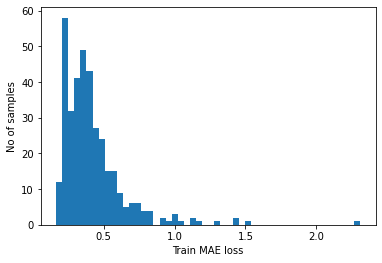

Reconstruction error threshold:  2.3119817


In [147]:
# Get train MAE loss.
x_train_pred = autoencoder_model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

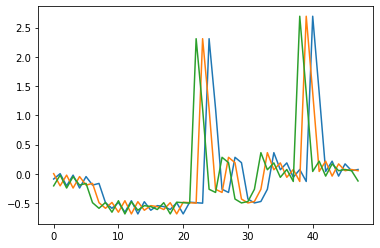

In [136]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train[1])
plt.plot(x_train[2])
#plt.plot(x_train_pred[1])
plt.show()

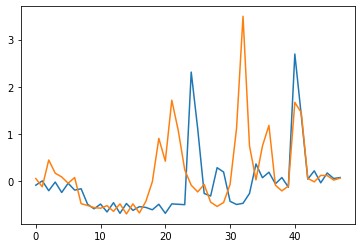

In [149]:

# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train[1])
plt.plot(x_train[2])
#plt.plot(x_train_pred[1])
plt.show()

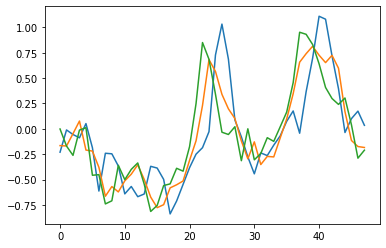

In [137]:
# Checking how the first sequence is learnt
plt.plot(x_train_pred[0])
plt.plot(x_train_pred[1])
plt.plot(x_train_pred[2])
#plt.plot(x_train_pred[1])
plt.show()

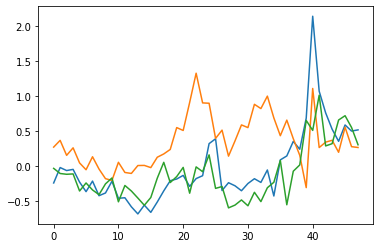

In [150]:
# Checking how the first sequence is learnt
plt.plot(x_train_pred[0])
plt.plot(x_train_pred[1])
plt.plot(x_train_pred[2])
#plt.plot(x_train_pred[1])
plt.show()

Prepare Test Data

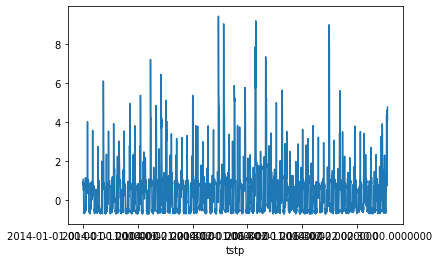

Test input shape:  (58, 48)


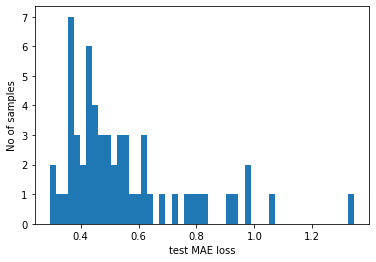

Number of anomaly samples:  0
Indices of anomaly samples:  (array([], dtype=int64),)


In [151]:
df_test_value = (test_data["energy(kWh/hh)"] - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = autoencoder_model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))
#print(test_mae_loss)

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

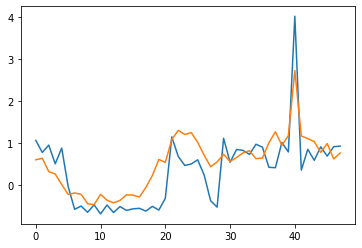

In [153]:
plt.plot(x_test[0])
plt.plot(x_test_pred[0])
plt.show()